In [1]:
# Time Series Forecasting
## ARIMA - Auto Regressive Integrated Moving Average
### Durbin watson value should be either less than 1.5 or more than 2.5
### There must be date and time column
### Date column should be in sequence order
### There should not be any missing data - imputation method
### check whether we have trend, seasonality, cyclical and random noise - decomposition method
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction)
### Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

# Import the required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

In [85]:
df = pd.read_csv('datasets_302666_618181_AAPL.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
5,8/22/2018,214.100006,216.360001,213.839996,215.050003,211.763901,19018100
6,8/23/2018,214.649994,217.050003,214.600006,215.490005,212.197189,18883200
7,8/24/2018,216.600006,216.899994,215.110001,216.160004,212.856949,18476400
8,8/27/2018,217.149994,218.740005,216.330002,217.940002,214.609741,20525100
9,8/28/2018,219.009995,220.539993,218.919998,219.699997,216.342850,22776800


In [3]:
from pandas.tseries.offsets import BDay       # to know the business working day

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df.shape  # sat , sun and other holidays are not considered as missing value

(251, 7)

In [5]:
df_date = df[['Date','Volume']]

In [6]:
df_date.tail()

,Date,Volume
246,8/8/2019,27009500
247,8/9/2019,24619700
248,8/12/2019,22474900
249,8/13/2019,47218500
250,8/14/2019,36453100


#### Date range for the buisness day

In [7]:
date1 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=BDay())

In [8]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [9]:
len(date1)

261

#### Adding us calender to remove the us holiday from the data set

In [10]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [11]:
date2 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [12]:
date2

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [13]:
len(date2)

251

In [14]:
# Adding the date range obtain form us holiday calender and the open price --  into the data frame created df_data

In [15]:
df_date.info()   
# As you can observe the date is in object -dtype --- so you can add other date col to the table or convert it using pd.datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    251 non-null    object
 1   Volume  251 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [16]:
df_date['Time_Stamp'] = pd.DataFrame(date2, columns=['Date'])
df_date['Open'] = pd.DataFrame(df, columns=['Open'])

In [17]:
df_date

,Date,Volume,Time_Stamp,Open
0,8/15/2018,28807600,2018-08-15,209.220001
1,8/16/2018,28500400,2018-08-16,211.750000
2,8/17/2018,35427000,2018-08-17,213.440002
3,8/20/2018,30287700,2018-08-20,218.100006
4,8/21/2018,26159800,2018-08-21,216.800003
...,...,...,...,...
246,8/8/2019,27009500,2019-08-08,200.199997
247,8/9/2019,24619700,2019-08-09,201.300003
248,8/12/2019,22474900,2019-08-12,199.619995
249,8/13/2019,47218500,2019-08-13,201.020004


#### Check for the missing value

In [18]:
df_date.isnull().sum()

Date          0
Volume        0
Time_Stamp    0
Open          0
dtype: int64

#### Durbin Watson Test

In [19]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Volume'])

0.13804147049471416

In [20]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Open'])

0.0003174209031518406

In [21]:
# As you can observe the range is less than 1.5 and more than 2.5  we will go for time series forecasting

#### Decomposition method

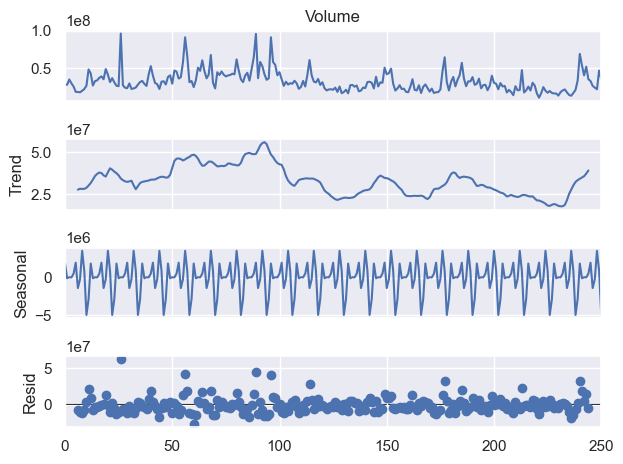

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_date['Volume'], period=12)
decomposition.plot()
plt.show()

In [23]:
# ALT to add the another col and assigning date you can convert the string into date time format

In [24]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

In [25]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 8.0 KB


In [26]:
# To observe the affect of change of volume with the change of date

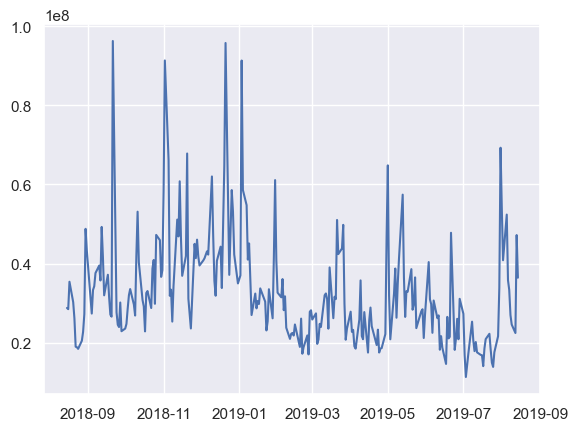

In [27]:
plt.plot(df_date['Date'], df_date['Volume'])
plt.show()

In [28]:
# As observed there is certain flucuation in particular month means there is seasonality

In [29]:
df_date['Volume'].describe()

count    2.510000e+02
mean     3.289967e+07
std      1.385336e+07
min      1.136200e+07
25%      2.329740e+07
50%      2.985580e+07
75%      3.927970e+07
max      9.624670e+07
Name: Volume, dtype: float64

In [30]:
# another method of importing dataset
df_final = pd.read_csv('datasets_302666_618181_AAPL.csv', parse_dates=True, index_col=0)
df_final.head()
# As the date is the unique col and it allow easily to select subset of your data based on specific range

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


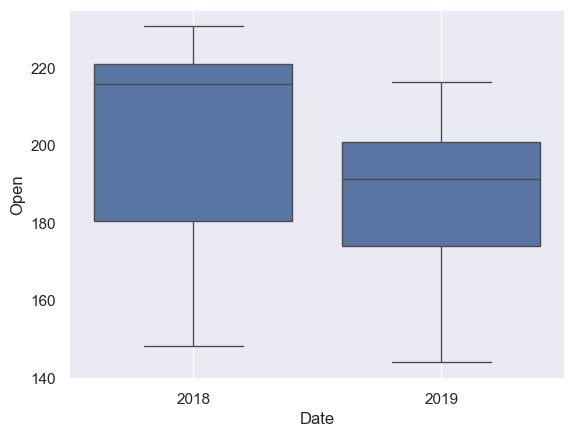

In [32]:
sns.boxplot(x=df_final.index.year, y= df_final['Open'])
plt.grid()

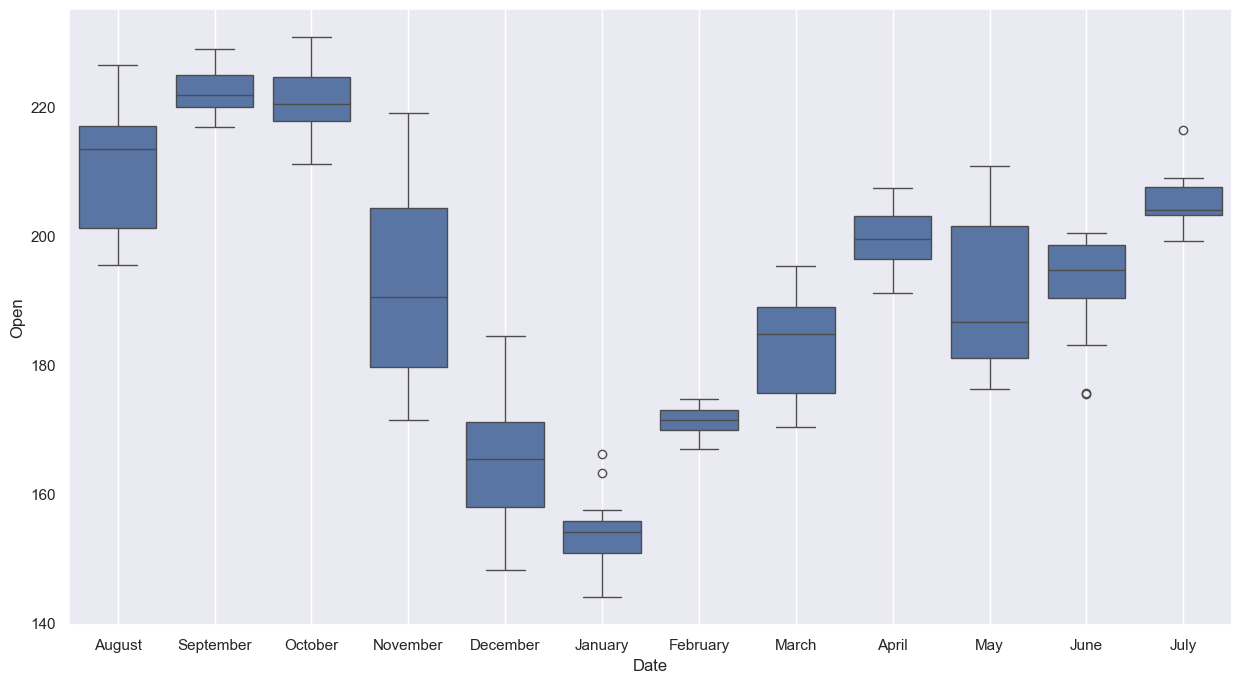

In [33]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x=df_final.index.month_name(), y= df_final['Open'])
plt.grid()

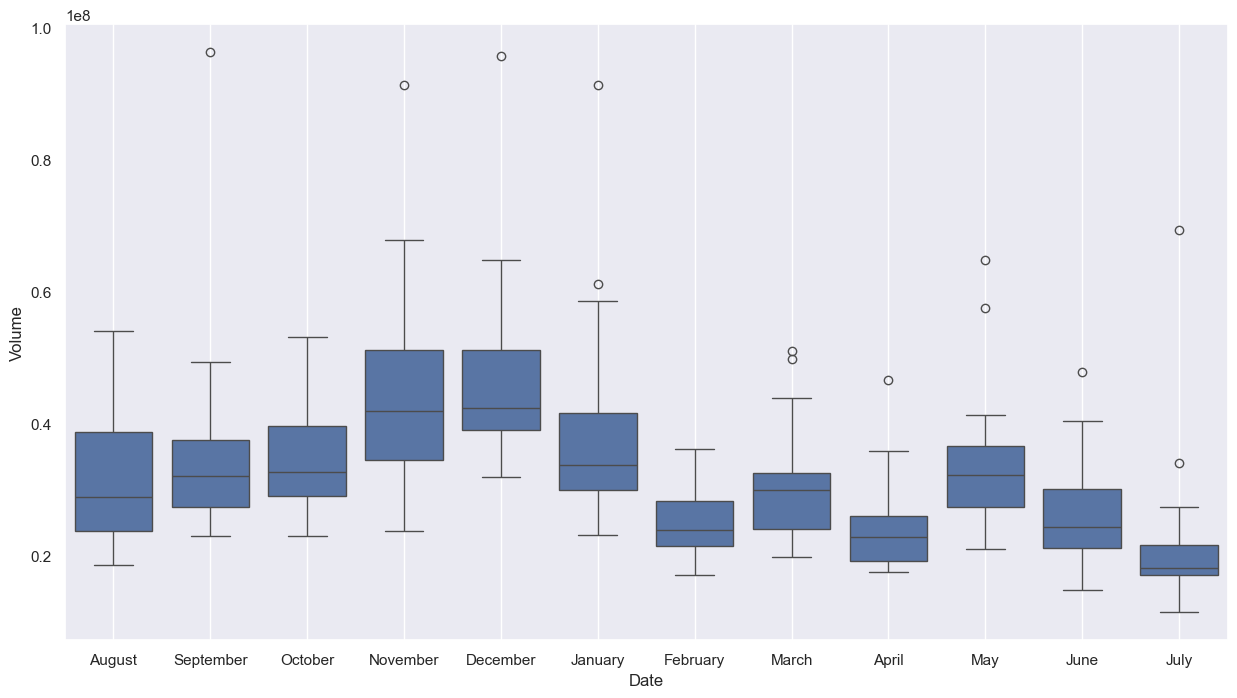

In [34]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x=df_final.index.month_name(), y= df_final['Volume'])
plt.grid()

In [35]:
df_final['Month'] = df_final.index.month
df_final['Year'] = df_final.index.year

In [36]:
df_final

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018
...,...,...,...,...,...,...,...,...
2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500,8,2019
2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700,8,2019
2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900,8,2019


In [37]:
df['Time_Stamp'] = pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_Stamp')
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
...,...,...,...,...,...,...,...
2019-08-08,8/8/2019,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,8/9/2019,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,8/12/2019,199.619995,202.050003,199.149994,200.479996,200.479996,22474900


In [38]:
df_final_model['Date'] = pd.to_datetime(df_final_model['Date'])
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [39]:
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [40]:
df_final_model.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2019-08-08,2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900
2019-08-13,2019-08-13,201.020004,212.139999,200.479996,208.970001,208.970001,47218500
2019-08-14,2019-08-14,203.160004,206.440002,202.589996,202.750000,202.750000,36453100


In [41]:
len(df_final_model)

251

#### Train Test split

In [42]:
# here the data for processing should be in sequence order

In [43]:
# very important point
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2019-06-05')]
train.shape

(201, 7)

In [44]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-05')]
test.shape

(50, 7)

In [45]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [46]:
train_final.head()

,Volume
Time_Stamp,
2018-08-15,28807600
2018-08-16,28500400
2018-08-17,35427000
2018-08-20,30287700
2018-08-21,26159800


In [47]:
train_final.tail()

,Volume
Time_Stamp,
2019-05-29,28481200
2019-05-30,21218400
2019-05-31,27043600
2019-06-03,40396100
2019-06-04,30968000


In [48]:
test_final.head()

,Volume
Time_Stamp,
2019-06-05,29773400
2019-06-06,22526300
2019-06-07,30684400
2019-06-10,26220900
2019-06-11,26932900


In [49]:
test_final.tail()

,Volume
Time_Stamp,
2019-08-08,27009500
2019-08-09,24619700
2019-08-12,22474900
2019-08-13,47218500
2019-08-14,36453100


# Automation method - Facebook Prophet model

In [50]:
!pip install prophet

In [51]:
import prophet

In [101]:

from prophet import Prophet

In [53]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [54]:
model = Prophet()

In [102]:
df_final_model.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [56]:
df_final_model_1 = df_final_model[['Date','Volume']]
df_final_model_1

,Date,Volume
Time_Stamp,,
2018-08-15,2018-08-15,28807600
2018-08-16,2018-08-16,28500400
2018-08-17,2018-08-17,35427000
2018-08-20,2018-08-20,30287700
2018-08-21,2018-08-21,26159800
...,...,...
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900


In [57]:
# Renaming the column --as facebook Prophet model work on ds and y
df_final_model_1.columns = ['ds','y']

In [58]:
df_final_model_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


#### Model building

In [59]:
model.fit(df_final_model_1)

16:32:09 - cmdstanpy - INFO - Chain [1] start processing
16:32:09 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [61]:
df_final_model_1.tail()

,ds,y
Time_Stamp,,
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900
2019-08-13,2019-08-13,47218500
2019-08-14,2019-08-14,36453100


#### Future prediction

In [65]:
future_dates = model.make_future_dataframe(periods=1000)
future_dates.tail()

,ds
1246,2022-05-06
1247,2022-05-07
1248,2022-05-08
1249,2022-05-09
1250,2022-05-10


In [66]:
predict = model.predict(future_dates)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-15,3.518019e+07,1.884804e+07,5.268263e+07,3.518019e+07,3.518019e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,3.575764e+07
1,2018-08-16,3.519278e+07,1.943490e+07,5.405771e+07,3.519278e+07,3.519278e+07,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,0.0,0.0,0.0,3.629997e+07
2,2018-08-17,3.520538e+07,2.231604e+07,5.459732e+07,3.520538e+07,3.520538e+07,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,3.822372e+07
3,2018-08-20,3.524315e+07,2.121713e+07,5.322157e+07,3.524315e+07,3.524315e+07,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,3.667853e+07
4,2018-08-21,3.525575e+07,1.808576e+07,5.259536e+07,3.525575e+07,3.525575e+07,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,0.0,0.0,0.0,3.550325e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2022-05-06,-2.592481e+07,-5.117295e+07,2.856783e+06,-4.719831e+07,-5.151777e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,-2.290647e+07
1247,2022-05-07,-2.597456e+07,-5.717816e+07,-2.157394e+06,-4.726608e+07,-5.161798e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,0.0,0.0,0.0,-2.916749e+07
1248,2022-05-08,-2.602430e+07,-5.677841e+07,-3.287165e+06,-4.733637e+07,-5.175064e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,0.0,0.0,0.0,-2.921723e+07
1249,2022-05-09,-2.607405e+07,-5.337967e+07,2.289086e+06,-4.741726e+07,-5.189644e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,-2.463867e+07


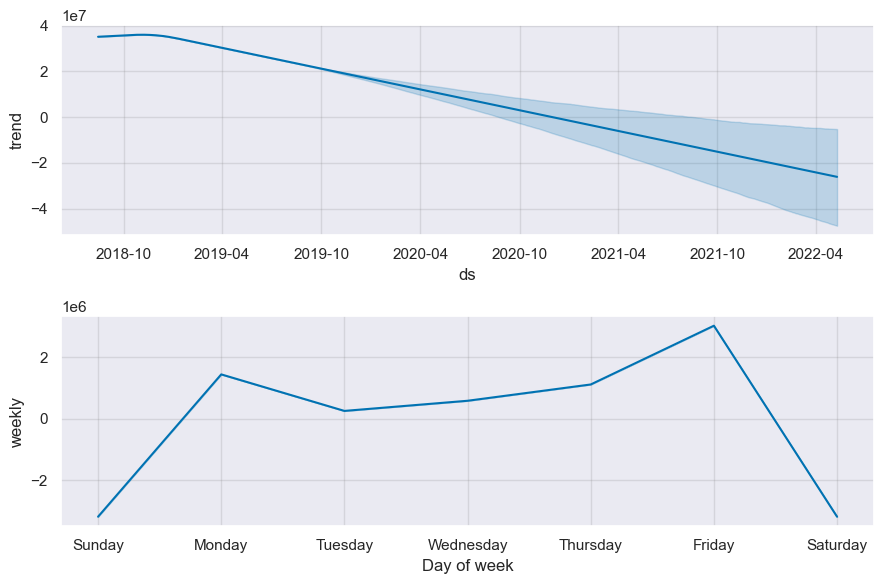

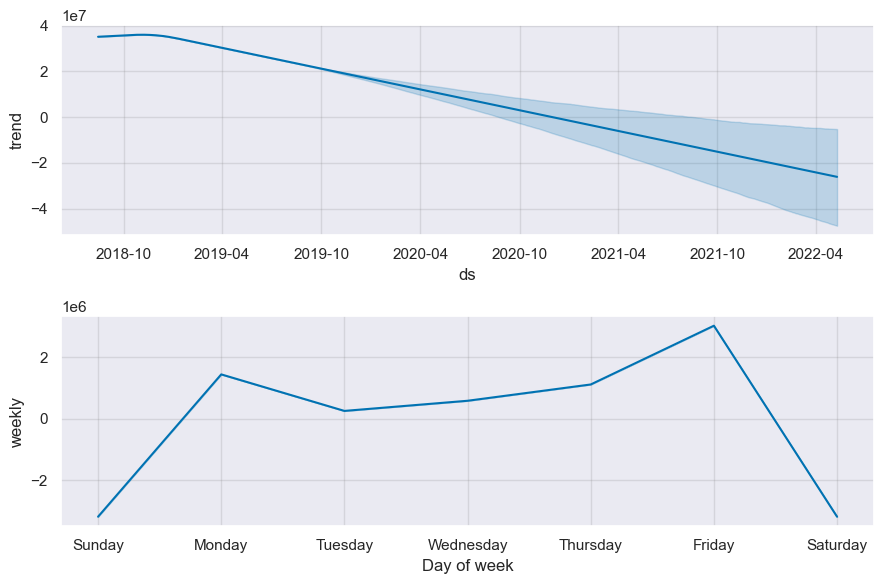

In [67]:
model.plot_components(predict)

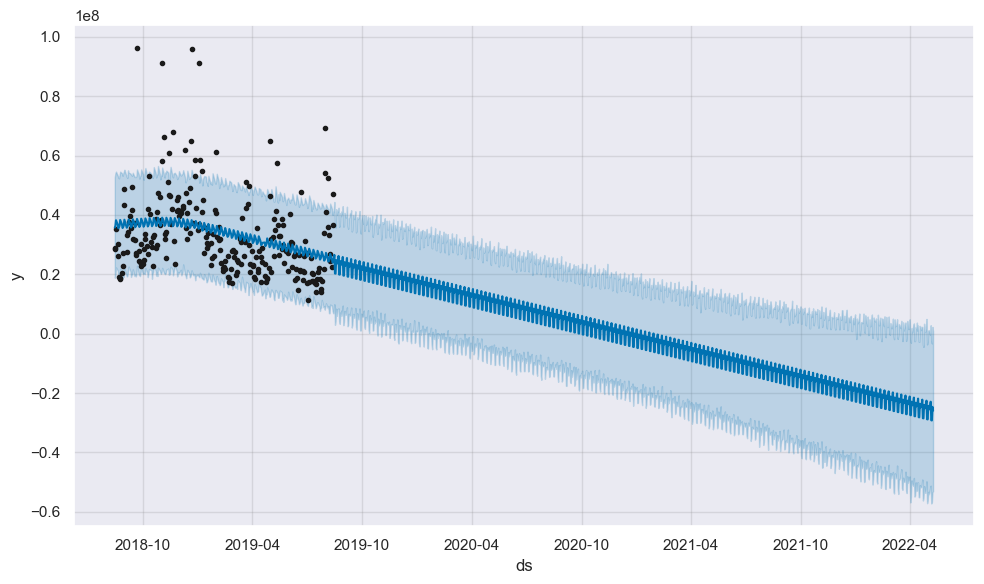

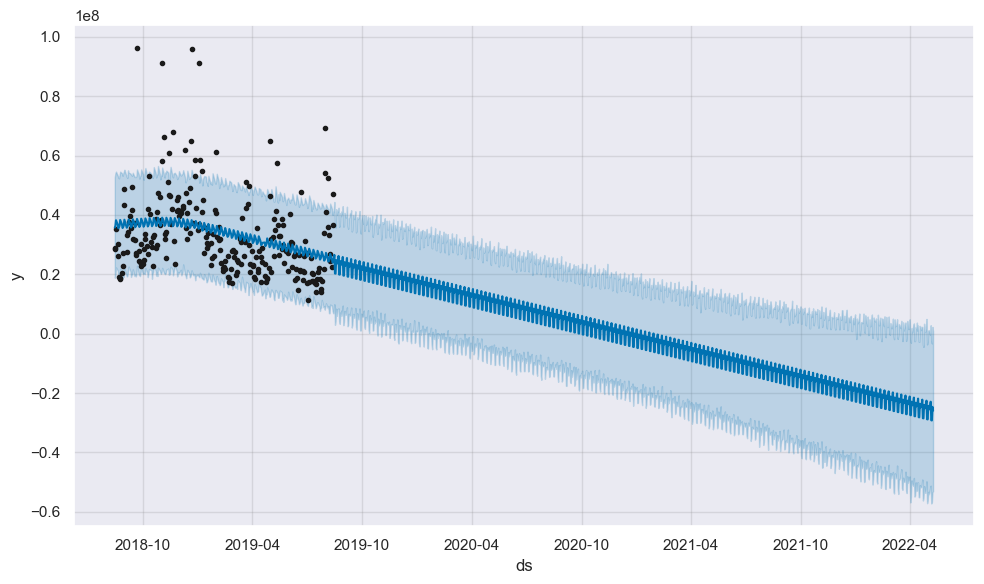

In [68]:
model.plot(predict)